In [324]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [325]:
# set random seed
np.random.seed(0)
# generate a sample of 0's and 1's ('No','Yes') 100 times
y_true = np.random.choice(2, 100)
y_pred = np.random.choice(2, 100)

In [326]:
conf_mat = confusion_matrix(y_true, y_pred)

In [327]:
def plotConfusionMatrix(conf_mat, cmap=None, 
                        classes=None, rotate_x=None,
                        rotate_y=0):
    """
    Plot the output of a confusion matrix (conf_mat) as a heatmap.
    
    Parameters
    ----------
    conf_mat : array, shape = [n_classes, n_classes]
    The confusion matrix.

    cmap : matplotlib/seaborn colormap
    The colormap to be used for the heatmap. Default is `sns.cm.mpl_cm.Blues`
    
    classes : list/array
    The targets (class labels) as strings. Default is `None`
    
    rotate_x : integer/float
    The number of degrees to rotate the x-axis ticklabels clockwise. Default is `None`
    
    rotate_y : integer/float
    The number of degrees to rotate the y-axis ticklabels clockwise. Default is 0
    """
    
    # if colormap is not specified, set it
    if cmap is None:
        cmap = sns.cm.mpl_cm.Blues
        
    # create the seaborn heatmap  
    heat = sns.heatmap(conf_mat,
                       cmap = cmap,
                       square = True,
                       annot = True, 
                       annot_kws = {'fontsize': 14})
    
    # set axes labels and plot title
    heat.set_xlabel('Predicted Class')
    heat.set_ylabel('Actual Class')
    heat.set_title('Confusion Matrix')
    
    # if we have the class names, set them as the tick-labels
    if classes is not None: 
        heat.xaxis.set_ticklabels(classes, rotation=rotate_x)
        heat.yaxis.set_ticklabels(classes, rotation=rotate_y)
    else: 
        heat.yaxis.set_ticklabels(heat.yaxis.get_ticklabels(), rotation=rotate_y)

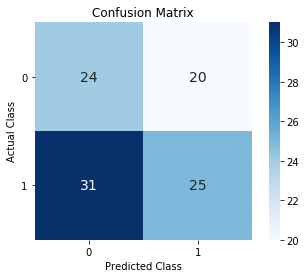

In [328]:
# plot confusion matrix with encoded class labels
plotConfusionMatrix(conf_mat)

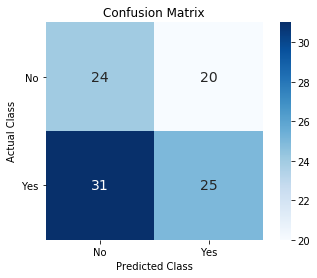

In [329]:
# plot confusion matrix with a list of class labels
plotConfusionMatrix(conf_mat, classes=['No', 'Yes'])

In [330]:
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [331]:
dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

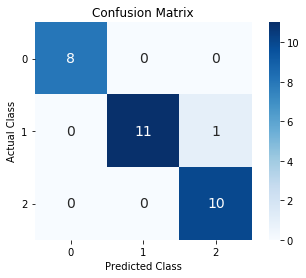

In [332]:
# plot confusion matrix with encoded class labels
plotConfusionMatrix(conf_mat)

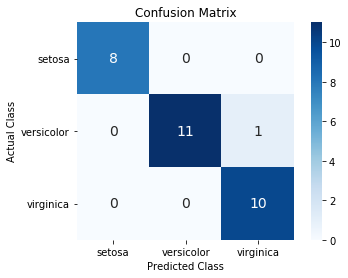

In [333]:
# plot confusion matrix with class labels
plotConfusionMatrix(conf_mat, classes=class_names)

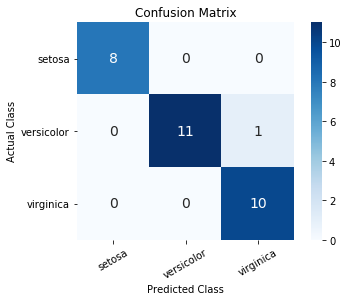

In [334]:
# plot confusion matrix with class labels & rotate x-axis ticklabels
plotConfusionMatrix(conf_mat, classes=class_names, 
                    rotate_x=30)

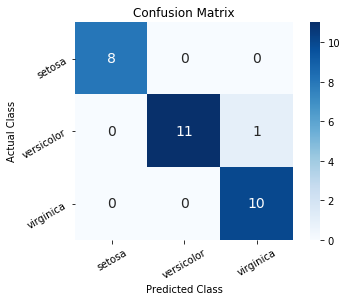

In [335]:
# plot confusion matrix with class labels & rotate x and y-axis ticklabels
plotConfusionMatrix(conf_mat, classes=class_names, 
                    rotate_x=30, rotate_y=30)

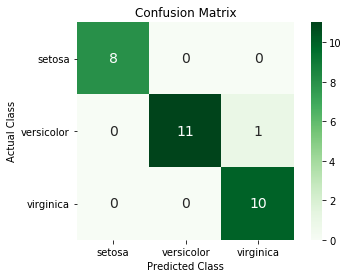

In [336]:
# plot confusion matrix with class labels & a different colormap
plotConfusionMatrix(conf_mat, classes=class_names, 
                    cmap=sns.cm.mpl_cm.Greens)

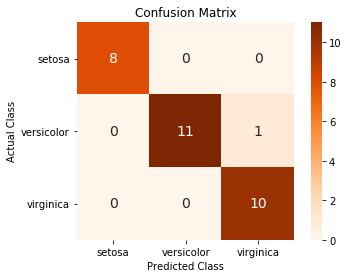

In [337]:
# plot confusion matrix with class labels & a different colormap
plotConfusionMatrix(conf_mat, classes=class_names, 
                    cmap=sns.cm.mpl_cm.Oranges)